# reset the memory

In [1]:
%reset -f 

# let's see how to do a regression using Python package "statsmodels"

In [2]:
import numpy  as np
import scipy  as sp
import pandas as pd

import statsmodels.api   as sm
import matplotlib.pyplot as plt

In [3]:
seed = 0
rng = np.random.default_rng(seed)

%config InlineBackend.figure_format = 'retina'

# load data into python

In [4]:
df = pd.read_csv("HPRICE3.csv")

# check the data in the table "df"

In [5]:
df.describe()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.566978,2.208723,15822.429907,16442.367601,9.480513,96100.660436,6.585670,2106.728972,39629.890966,2.339564,20715.576324,9.837414,11.378118,0.442368,7.597232,10.301859,90.482240
std,1.492329,32.565845,4801.788757,2.164353,8967.106296,9033.130652,0.777165,43223.728867,0.901204,694.957902,39514.390241,0.770526,8508.183950,0.478383,0.438174,0.497443,0.340723,0.801752,14.066464
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,10.165852,0.000000,6.599871,7.444249,47.717705
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.104999,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,11.082143,0.000000,7.352441,9.737138,82.901016
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,11.360939,0.000000,7.628518,10.681894,93.708206
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.695247,1.000000,7.841493,10.738568,101.727400
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,12.611538,1.000000,8.544030,13.207623,108.868350


In [6]:
df.columns

Index(['year', 'age', 'agesq', 'nbh', 'cbd', 'inst', 'linst', 'price', 'rooms',
       'area', 'land', 'baths', 'dist', 'ldist', 'lprice', 'y81', 'larea',
       'lland', 'linstsq'],
      dtype='object')

In [7]:
df.head()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,4578,1,10700,9.277999,11.002100,0,7.414573,8.429017,47.717705
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,8370,2,11000,9.305651,10.596635,0,7.867871,9.032409,47.717705
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,5000,1,11500,9.350102,10.434115,0,7.042286,8.517193,47.717705
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,10000,1,11900,9.384294,11.065075,0,7.035269,9.210340,47.717705
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,10000,1,12100,9.400961,10.691945,0,7.532624,9.210340,57.773682


In [8]:
df.tail()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
316,1981,25,625,0,10000,10000,9.2103,60000,6,1388,7500,1,16900,9.735069,11.002100,1,7.235619,8.922658,84.829636
317,1981,0,0,6,24000,26000,10.1660,144500,7,3140,48787,3,25000,10.126630,11.881035,1,8.051978,10.795219,103.347560
318,1981,20,400,0,15000,15000,9.6158,97000,6,1296,44867,2,21300,9.966462,11.482467,1,7.167038,10.711458,92.463608
319,1981,19,361,0,14000,15000,9.6158,95000,5,1148,44182,2,20500,9.928180,11.461632,1,7.045776,10.696073,92.463608
320,1981,0,0,0,13000,13000,9.4727,204080,7,2261,45465,3,19400,9.873028,12.226268,1,7.723562,10.724698,89.732048


# check the data for specific variables in the table "df"

# we focus on the y variable $\log \left( \mathrm{price} \right)$ and x variables rooms, baths, ldist, larea, lland.

In [9]:
df[['lprice', 'rooms', 'baths', 'ldist', 'larea', 'lland']].describe()

,lprice,rooms,baths,ldist,larea,lland
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,11.378118,6.585670,2.339564,9.837414,7.597232,10.301859
std,0.438174,0.901204,0.770526,0.478383,0.340723,0.801752
min,10.165852,4.000000,1.000000,8.517193,6.599871,7.444249
25%,11.082143,6.000000,2.000000,9.503010,7.352441,9.737138
50%,11.360939,7.000000,2.000000,9.898475,7.628518,10.681894
75%,11.695247,7.000000,3.000000,10.210970,7.841493,10.738568
max,12.611538,10.000000,4.000000,10.596630,8.544030,13.207623


In [10]:
df[['lprice', 'rooms', 'baths', 'ldist', 'larea', 'lland']].head()

,lprice,rooms,baths,ldist,larea,lland
0,11.002100,7,1,9.277999,7.414573,8.429017
1,10.596635,6,2,9.305651,7.867871,9.032409
2,10.434115,6,1,9.350102,7.042286,8.517193
3,11.065075,5,1,9.384294,7.035269,9.210340
4,10.691945,5,1,9.400961,7.532624,9.210340


In [11]:
df[['lprice', 'rooms', 'baths', 'ldist', 'larea', 'lland']].tail()

,lprice,rooms,baths,ldist,larea,lland
316,11.002100,6,1,9.735069,7.235619,8.922658
317,11.881035,7,3,10.126630,8.051978,10.795219
318,11.482467,6,2,9.966462,7.167038,10.711458
319,11.461632,5,2,9.928180,7.045776,10.696073
320,12.226268,7,3,9.873028,7.723562,10.724698


# start regression using statsmodels

In [12]:
Xvar = df[['rooms', 'baths', 'ldist', 'larea', 'lland']]
Yvar = df[['lprice']]
Xvar = sm.add_constant(Xvar)

In [13]:
Xvar.columns

Index(['const', 'rooms', 'baths', 'ldist', 'larea', 'lland'], dtype='object')

In [14]:
Yvar

,lprice
0,11.002100
1,10.596635
2,10.434115
3,11.065075
4,10.691945
...,...
316,11.002100
317,11.881035
318,11.482467
319,11.461632


In [15]:
Xvar

,const,rooms,baths,ldist,larea,lland
0,1.0,7,1,9.277999,7.414573,8.429017
1,1.0,6,2,9.305651,7.867871,9.032409
2,1.0,6,1,9.350102,7.042286,8.517193
3,1.0,5,1,9.384294,7.035269,9.210340
4,1.0,5,1,9.400961,7.532624,9.210340
...,...,...,...,...,...,...
316,1.0,6,1,9.735069,7.235619,8.922658
317,1.0,7,3,10.126630,8.051978,10.795219
318,1.0,6,2,9.966462,7.167038,10.711458
319,1.0,5,2,9.928180,7.045776,10.696073


array([[<AxesSubplot:xlabel='lprice', ylabel='lprice'>,
        <AxesSubplot:xlabel='rooms', ylabel='lprice'>,
        <AxesSubplot:xlabel='baths', ylabel='lprice'>,
        <AxesSubplot:xlabel='ldist', ylabel='lprice'>,
        <AxesSubplot:xlabel='larea', ylabel='lprice'>,
        <AxesSubplot:xlabel='lland', ylabel='lprice'>],
       [<AxesSubplot:xlabel='lprice', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='baths', ylabel='rooms'>,
        <AxesSubplot:xlabel='ldist', ylabel='rooms'>,
        <AxesSubplot:xlabel='larea', ylabel='rooms'>,
        <AxesSubplot:xlabel='lland', ylabel='rooms'>],
       [<AxesSubplot:xlabel='lprice', ylabel='baths'>,
        <AxesSubplot:xlabel='rooms', ylabel='baths'>,
        <AxesSubplot:xlabel='baths', ylabel='baths'>,
        <AxesSubplot:xlabel='ldist', ylabel='baths'>,
        <AxesSubplot:xlabel='larea', ylabel='baths'>,
        <AxesSubplot:xlabel='lland', ylabel='baths'>],
       [<AxesSub

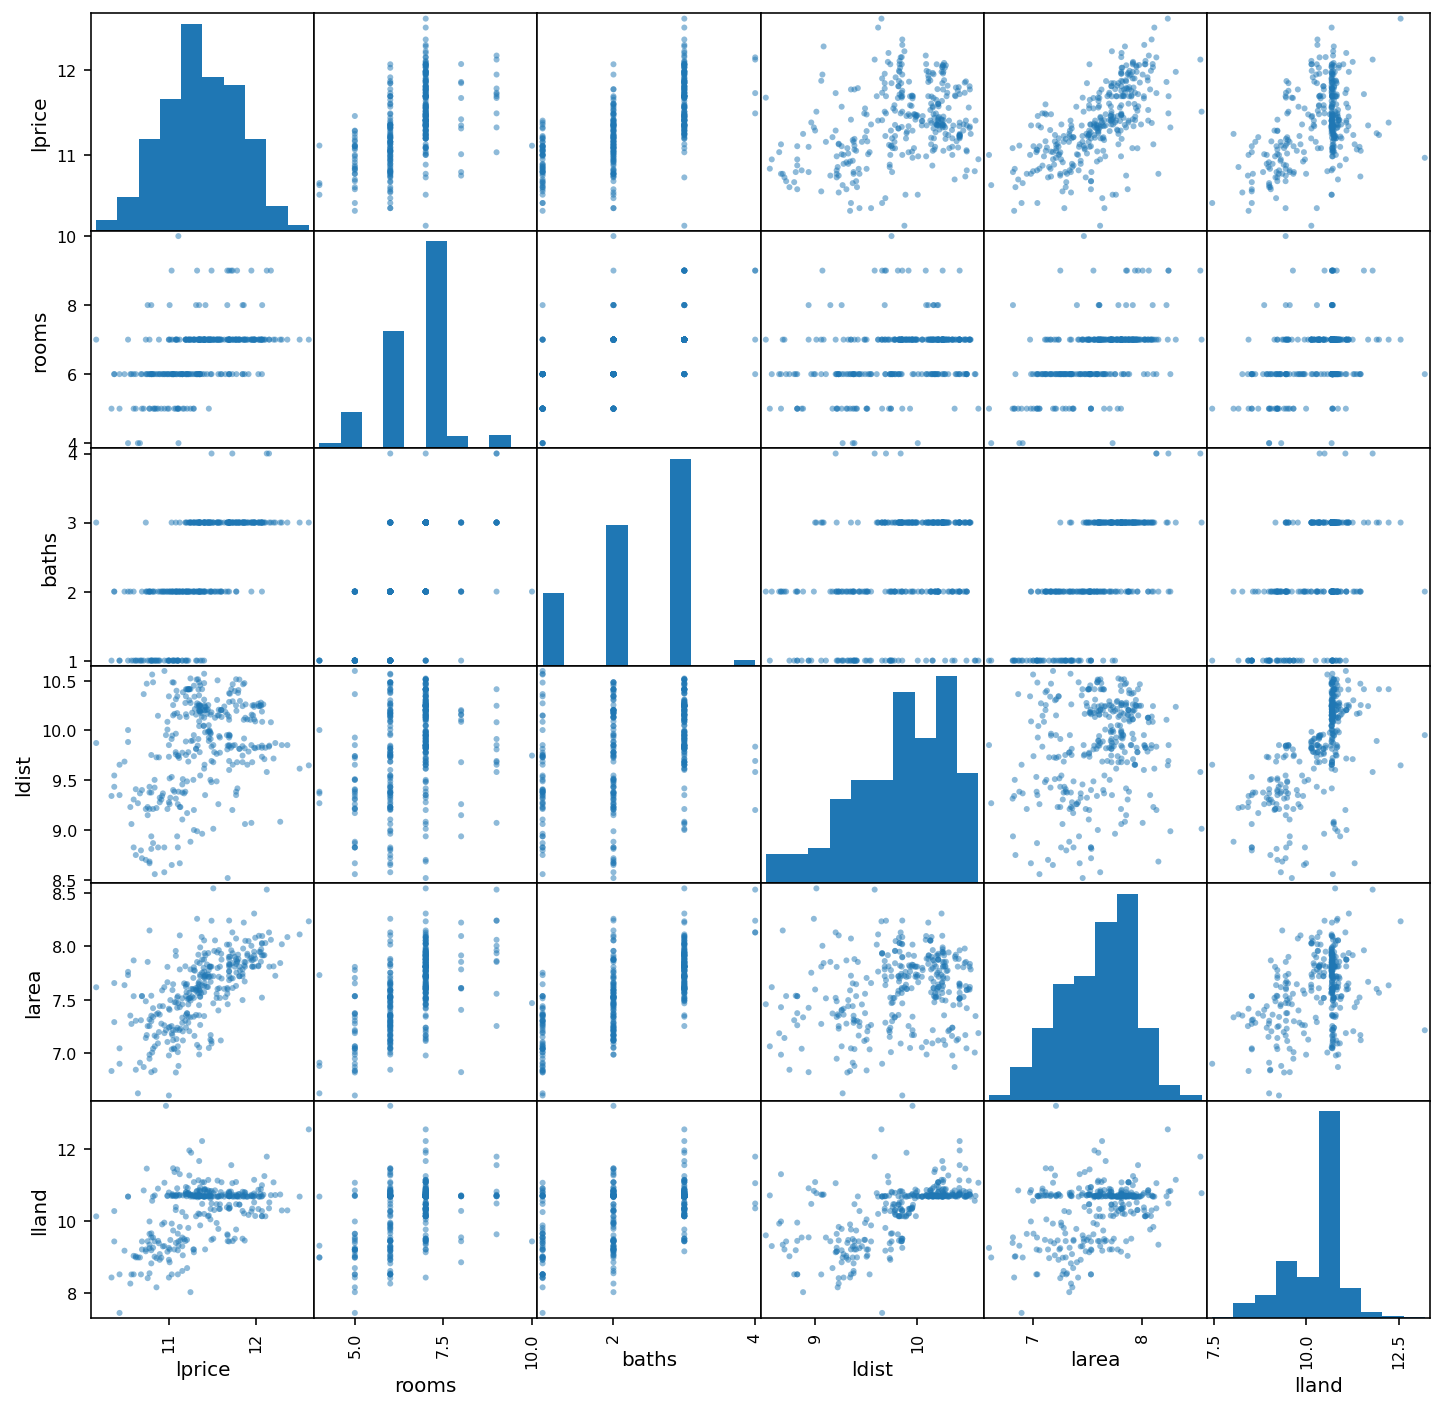

In [16]:
pd.plotting.scatter_matrix(df[['lprice', 'rooms', 'baths', 'ldist', 'larea', 'lland']],
                           alpha=0.5,
                           figsize=(12, 12))

In [17]:
corr = df[['lprice', 'rooms', 'baths', 'ldist', 'larea', 'lland']].corr()
corr.style.background_gradient(cmap='coolwarm')

,lprice,rooms,baths,ldist,larea,lland
lprice,1.000000,0.493313,0.674628,0.346329,0.655828,0.476475
rooms,0.493313,1.000000,0.603766,0.311293,0.560578,0.399310
baths,0.674628,0.603766,1.000000,0.387459,0.709347,0.494931
ldist,0.346329,0.311293,0.387459,1.000000,0.216769,0.631393
larea,0.655828,0.560578,0.709347,0.216769,1.000000,0.387663
lland,0.476475,0.399310,0.494931,0.631393,0.387663,1.000000


In [18]:
reg = sm.OLS(Yvar, Xvar)

result = reg.fit()

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     74.83
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.71e-51
Time:                        14:21:52   Log-Likelihood:                -64.455
No. Observations:                 321   AIC:                             140.9
Df Residuals:                     315   BIC:                             163.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2701      0.625     10.038      0.0

# construct confidence interval

In [20]:
result.conf_int(alpha=0.01)

,0,1
const,4.651415,7.888830
rooms,-0.045105,0.080228
baths,0.093521,0.272960
ldist,-0.075034,0.162719
larea,0.252759,0.628238
lland,0.001143,0.151407


# F-test

In [21]:
result.f_test('rooms=baths=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[16.70692382]]), p=1.2702392266952252e-07, df_denom=315, df_num=2>

# t-test

In [22]:
hypotheses = 'rooms = 1, baths = 2, ldist = 3'
result.t_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0176      0.024    -40.628      0.000      -0.030       0.065
c1             0.1832      0.035    -52.477      0.000       0.115       0.251
c2             0.0438      0.046    -64.445      0.000      -0.046       0.134

# Prediction

In [23]:
df['y_pred'] = result.predict(Xvar)

df['y_pred']

0      10.892094
1      11.304686
2      10.720428
3      10.754143
4      10.973958
         ...    
316    10.853395
317    11.757039
318    11.153011
319    11.079181
320    11.595874
Name: y_pred, Length: 321, dtype: float64

In [24]:
df['y_pred'].describe()

count    321.000000
mean      11.378118
std        0.322860
min       10.531596
25%       11.148415
50%       11.479695
75%       11.634080
max       12.239429
Name: y_pred, dtype: float64

<AxesSubplot:>

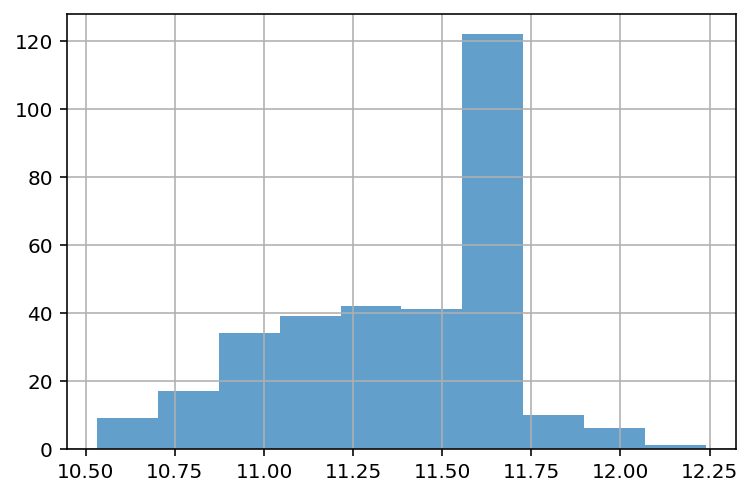

In [25]:
df['y_pred'].hist(alpha=0.7)

In [26]:
df['u_pred'] = df['lprice'] - df['y_pred']

df['u_pred']

0      0.110006
1     -0.708051
2     -0.286313
3      0.310932
4     -0.282013
         ...   
316    0.148705
317    0.123996
318    0.329456
319    0.382451
320    0.630394
Name: u_pred, Length: 321, dtype: float64

In [27]:
df['u_pred'].describe()

count    3.210000e+02
mean     2.999331e-14
std      2.962402e-01
min     -1.337297e+00
25%     -1.895151e-01
50%      6.858925e-04
75%      2.193219e-01
max      8.077552e-01
Name: u_pred, dtype: float64

<AxesSubplot:>

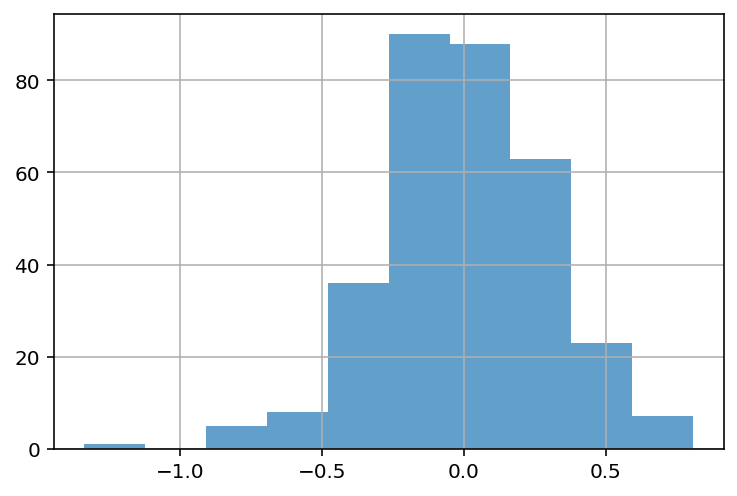

In [28]:
df['u_pred'].hist(alpha=0.7)

---
# now, using formula, let's calculate by hand 

# $$b=\begin{bmatrix}b_{0}\\
b_{1}\\
\vdots\\
b_{p}
\end{bmatrix} = \left(X^{T}X\right)^{-1} X^T y = \underset{\mbox{gram matrix}}{\underbrace{\left(X^{T}X\right)}}^{-1}\underset{\mbox{design matrix}}{\underbrace{X}}^T\quad\underset{\mbox{output matrix}}{\underbrace{y}}$$

In [29]:
dm = np.matrix(Xvar) #desgin matrix
om = np.matrix(Yvar) #output matrix

pd.DataFrame(dm).round(4)

,0,1,2,3,4,5
0,1.0,7.0,1.0,9.2780,7.4146,8.4290
1,1.0,6.0,2.0,9.3057,7.8679,9.0324
2,1.0,6.0,1.0,9.3501,7.0423,8.5172
3,1.0,5.0,1.0,9.3843,7.0353,9.2103
4,1.0,5.0,1.0,9.4010,7.5326,9.2103
...,...,...,...,...,...,...
316,1.0,6.0,1.0,9.7351,7.2356,8.9227
317,1.0,7.0,3.0,10.1266,8.0520,10.7952
318,1.0,6.0,2.0,9.9665,7.1670,10.7115
319,1.0,5.0,2.0,9.9282,7.0458,10.6961


In [30]:
gm = np.matmul(dm.T, dm) #gram matrix
cm = np.matmul(dm.T, om) #covariation matrix between X and y

b  = np.matmul(np.linalg.inv(gm), cm) 

In [31]:
pd.DataFrame(b).round(4)

,0
0,6.2701
1,0.0176
2,0.1832
3,0.0438
4,0.4405
5,0.0763


# predicted value of y $$\widehat{y} = Xb = b_0 + b_1 \cdot \mathbf{x}_1 + b_2 \cdot \mathbf{x}_2 + \ldots + b_p \cdot \mathbf{x}_p$$

In [32]:
yhat = np.matmul(dm, b)

df = pd.concat([df, pd.DataFrame(yhat, columns=['yhat'])], axis=1)

In [33]:
df['yhat'].describe()

count    321.000000
mean      11.378118
std        0.322860
min       10.531596
25%       11.148415
50%       11.479695
75%       11.634080
max       12.239429
Name: yhat, dtype: float64

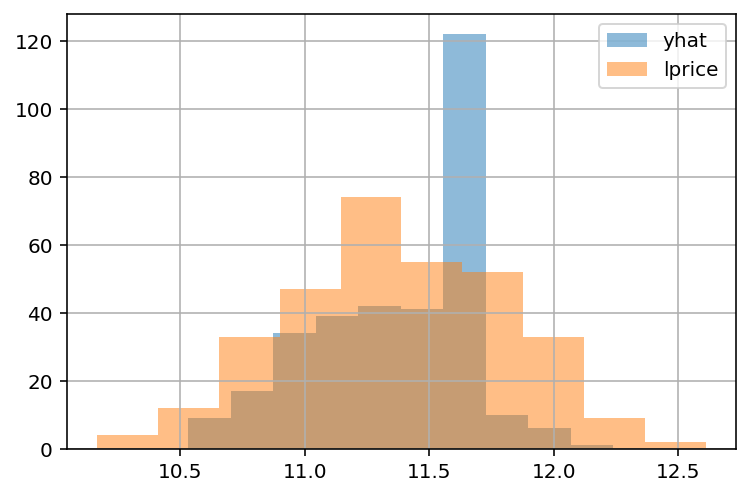

In [34]:
plt.figure()

df['yhat'].hist(legend="yhat", alpha=0.5)
df['lprice'].hist(legend="lprice", alpha=0.5)

plt.legend()
plt.show()

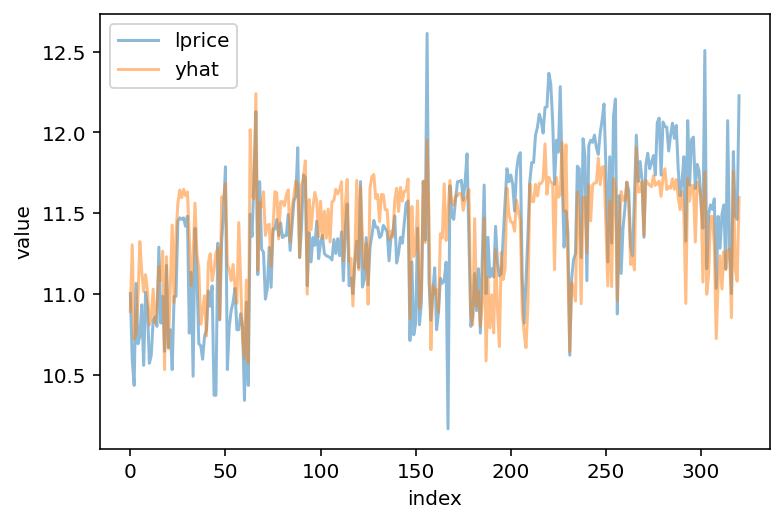

In [35]:
plt.figure()

df['lprice'].plot(alpha=0.5)
df['yhat'].plot(alpha=0.5)

plt.xlabel('index')
plt.ylabel('value')

plt.legend()
plt.show()

# predicted value of u (aka the prediction error of y) $$\widehat{u} = y - \widehat{y}$$

In [36]:
df['uhat'] = df['lprice'] - df['yhat']

In [37]:
df['uhat'].describe()

count    3.210000e+02
mean    -3.173315e-13
std      2.962402e-01
min     -1.337297e+00
25%     -1.895151e-01
50%      6.858925e-04
75%      2.193219e-01
max      8.077552e-01
Name: uhat, dtype: float64

<AxesSubplot:>

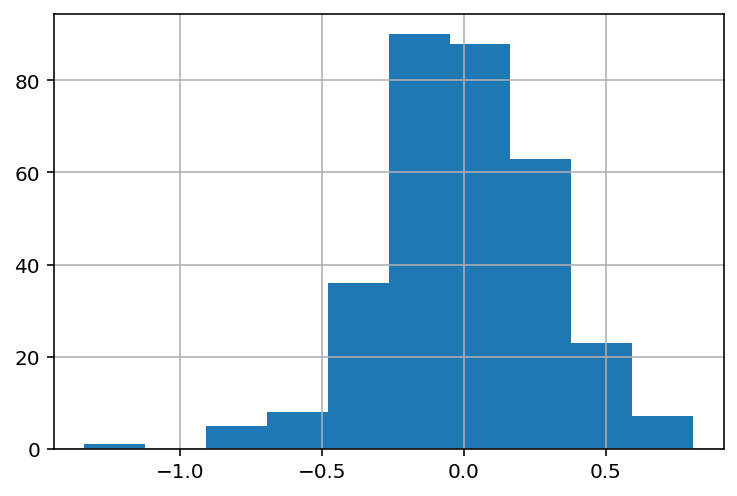

In [38]:
df['uhat'].hist()

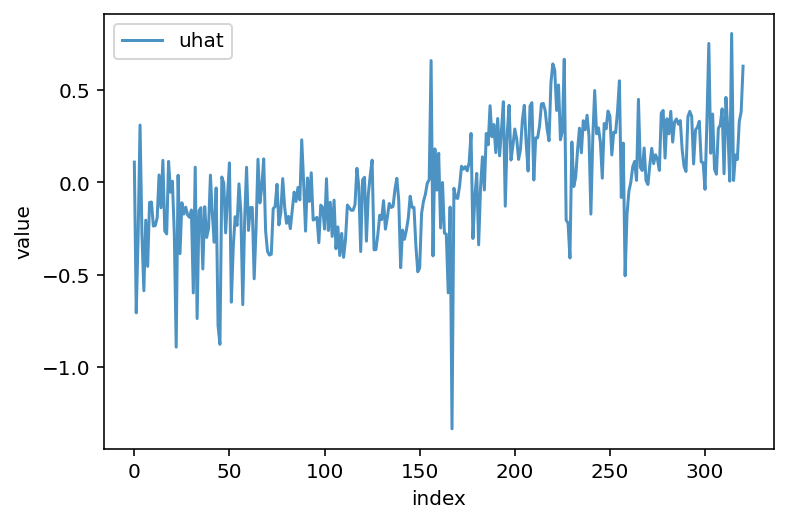

In [39]:
plt.figure()

df['uhat'].plot(alpha=0.8)

plt.xlabel('index')
plt.ylabel('value')

plt.legend()
plt.show()

# calculate the values for regression inference

# TSS $$ TSS = \sum_i (y_i - \overline{y} )^2$$

In [40]:
TSS = np.cov(df['lprice']) * ( len(df['lprice']) - 1)

TSS

61.438988950382985

# RSS $$ RSS = \sum_i (\widehat{u}_i )^2 $$

In [41]:
RSS = np.cov(df['uhat']) *  ( len(df['uhat']) - 1)

RSS

28.082640672189587

# MSE

In [42]:
var_u = RSS/(len(df['uhat']) - Xvar.shape[1])

MSE = np.sqrt(var_u)

MSE

0.2985820494088238

# ESS $$ ESS = TSS - RSS$$

In [43]:
ESS = TSS - RSS

ESS

33.356348278193394

# $R^2$ $$ R^2 = ESS/TSS = 1 - RSS/TSS$$

In [44]:
R2 = ESS/TSS

R2

0.5429182486243609

# adjusted $R^2$ $$ \overline{R}^2 = 1 - \frac{RSS/(n-k)}{TSS/(n-1)}$$

In [45]:
R2_a = 1 - (RSS / ( len(df['uhat']) - Xvar.shape[1] ) ) / (TSS / ( len(df['uhat']) - 1 ) )

R2_a

0.5356629827295096

# $\mathrm{cov} \left( b \right) = \mathbf{cov}\left(b\vert X\right)=\mathbf{E}\left[\left(b-\beta\right)\left(b-\beta\right)^{T}\vert X\right]$. 

## * Hence, we need to first calculate $$b-\beta$$

## * $$ \begin{array}{rrcl}
 & b & = & \left(X^{T}X\right)^{-1}X^{T}y\\
 &  & = & \left(X^{T}X\right)^{-1}X^{T}\left(X\beta+e\right)\\
 &  & = & \left(X^{T}X\right)^{-1}X^{T}\left(X\beta+e\right)\\
 &  & = & \left(X^{T}X\right)^{-1}X^{T}X\beta+\left(X^{T}X\right)^{-1}X^{T}e\\
 &  & = & \beta+\left(X^{T}X\right)^{-1}X^{T}e\\
\implies & b-\beta & = & \left(X^{T}X\right)^{-1}X^{T}e
\end{array} $$

## * Hence $$\begin{array}{rcl}
\mathbf{E}\left[\left(b-\beta\right)\left(b-\beta\right)^{T}\vert X\right] & = & \mathbf{E}\left[\left(X^{T}X\right)^{-1}X^{T}e\left(\left(X^{T}X\right)^{-1}X^{T}e\right)^{T}\vert X\right]\\
 & = & \mathbf{E}\left[\left(X^{T}X\right)^{-1}X^{T}ee^{T}X\left(X^{T}X\right)^{-1}\vert X\right]\\
 & = & \left(X^{T}X\right)^{-1}X^{T}\mathbf{E}\left[ee^{T}\vert X\right]X\left(X^{T}X\right)^{-1}
\end{array}$$

## * where $$ \mathbf{E}\left[ee^{T}\vert X\right] $$ is the covariance matrix of $\widehat{u}$

## * the standard OLS assumes $$ \mathbf{E}\left[ee^{T}\vert X\right] = \sigma^2 I$$

## * hence $$ \begin{array}{rcl}
\mathbf{cov}\left(b\vert X\right) & = & \left(X^{T}X\right)^{-1}X^{T}\mathbf{E}\left[ee^{T}\vert X\right]X\left(X^{T}X\right)^{-1}\\
 & = & \left(X^{T}X\right)^{-1}X^{T}\left(\sigma^{2}I\right)X\left(X^{T}X\right)^{-1}\\
 & = & \sigma^{2}\cdot\left(X^{T}X\right)^{-1}X^{T}X\left(X^{T}X\right)^{-1}\\
 & = & \sigma^{2}\cdot\left(X^{T}X\right)^{-1}\\
 & = & \frac{\widehat{u}^{T}\widehat{u}}{n-k}\cdot\left(X^{T}X\right)^{-1}
\end{array} $$

## * the var(b|X) is the diagonal of cov(b|X)
## * the se(b|X) is the elementwise square roor of var(b|X)

# calculate $$ \mathrm{var}\left(\widehat{u}\right) \cdot \mathbf{I} $$

In [46]:
cov_u = np.eye(Xvar.shape[1]) * np.dot(df['uhat'],df['uhat'].T) / (len(df['uhat']) - Xvar.shape[1])

# compute $$ \mathrm{cov}\left( b \vert X \right) $$

In [47]:
mat_p  = np.matmul(np.linalg.inv(gm), dm.T)
mat_pt = np.matmul(dm, np.linalg.inv(gm))

cov_b = np.matmul(mat_p, mat_pt) * np.dot(df['uhat'],df['uhat'].T) / (len(df['uhat']) - Xvar.shape[1])

pd.DataFrame(cov_b).round(4)

,0,1,2,3,4,5
0,0.3901,0.0011,0.0130,-0.0161,-0.0368,0.0010
1,0.0011,0.0006,-0.0002,-0.0001,-0.0004,-0.0001
2,0.0130,-0.0002,0.0012,-0.0002,-0.0014,-0.0001
3,-0.0161,-0.0001,-0.0002,0.0021,0.0005,-0.0007
4,-0.0368,-0.0004,-0.0014,0.0005,0.0052,-0.0002
5,0.0010,-0.0001,-0.0001,-0.0007,-0.0002,0.0008


In [48]:
se_b  = np.sqrt(np.diag(cov_b)); se_b.shape = (se_b.shape[0],1)

pd.DataFrame(se_b).round(4)

,0
0,0.6246
1,0.0242
2,0.0346
3,0.0459
4,0.0724
5,0.0290


# t value for $b$ $$ t_{b}=\left[\begin{array}{c}
\frac{b_{0}-0}{se\left(b_{0}\right)}\\
\frac{b_{1}-0}{se\left(b_{1}\right)}\\
\vdots\\
\frac{b_{p}-0}{se\left(b_{p}\right)}
\end{array}\right] $$

In [61]:
t_b = np.divide(b-0, se_b)

pd.DataFrame(t_b).round(4)

,0
0,10.0384
1,0.7263
2,5.2929
3,0.9558
4,6.0806
5,2.6309


# two-tailed p-value for $t_{b_1}$

In [50]:
p_b = 2 * sp.stats.t.sf( np.abs(t_b),  len(df['uhat']) - Xvar.shape[1])

pd.DataFrame(p_b).round(4)

,0
0,0.0000
1,0.4682
2,0.0000
3,0.3399
4,0.0000
5,0.0089


# the upper/lower bound for the CI of slope
# $$ up=b+c\cdot se_{b}=\left[\begin{array}{c}
b_{0}\\
b_{1}\\
\vdots\\
b_{p}
\end{array}\right]+c\cdot\left[\begin{array}{c}
se\left(b_{0}\right)\\
se\left(b_{1}\right)\\
\vdots\\
se\left(b_{p}\right)
\end{array}\right]=\left[\begin{array}{c}
b_{0}+c\cdot se\left(b_{0}\right)\\
b_{1}+c\cdot se\left(b_{1}\right)\\
\vdots\\
b_{p}+c\cdot se\left(b_{p}\right)
\end{array}\right]$$

# $$ lo=b-c\cdot se_{b}=\left[\begin{array}{c}
b_{0}\\
b_{1}\\
\vdots\\
b_{p}
\end{array}\right]-c\cdot\left[\begin{array}{c}
se\left(b_{0}\right)\\
se\left(b_{1}\right)\\
\vdots\\
se\left(b_{p}\right)
\end{array}\right]=\left[\begin{array}{c}
b_{0}-c\cdot se\left(b_{0}\right)\\
b_{1}-c\cdot se\left(b_{1}\right)\\
\vdots\\
b_{p}-c\cdot se\left(b_{p}\right)
\end{array}\right]$$

In [60]:
c = sp.stats.t.ppf(0.975, len(df['uhat']) - Xvar.shape[1])

b_up = b + c * se_b
b_lo = b - c * se_b

print("-----------------------------")
print("the upper bound of 95% CI is ")
print(pd.DataFrame(b_up))
print("-----------------------------")
print("the lower bound of 95% CI is ")
print(pd.DataFrame(b_lo))
print("-----------------------------")

-----------------------------
the upper bound of 95% CI is 
          0
0  7.499068
1  0.065139
2  0.251356
3  0.134095
4  0.583033
5  0.133316
-----------------------------
the lower bound of 95% CI is 
          0
0  5.041177
1 -0.030016
2  0.115124
3 -0.046411
4  0.297964
5  0.019233
-----------------------------


# log likelihood

In [52]:
log_lh = np.sum(np.log(sp.stats.norm.pdf(df['uhat'], loc=0, scale=MSE)))
print("the log likelihood of regression is ", log_lh)

the log likelihood of regression is  -64.48319495801762


# AIC

In [53]:
AIC = -1 * log_lh *2 + 2 * Xvar.shape[1]
print("the AIC of regression is ", AIC)

the AIC of regression is  140.96638991603524


# BIC

In [54]:
BIC = -1 * log_lh *2 + Xvar.shape[1] * np.log(len(df['rooms']))
print("the AIC of regression is ", BIC)

the AIC of regression is  163.59503665481532


# F test

In [55]:
Fval_num = (TSS - RSS)/(Xvar.shape[1] - 1)
Fval_den = RSS/(len(df['uhat']) - Xvar.shape[1])
Fval = Fval_num / Fval_den

print("the default F value of regression is ", Fval)

the default F value of regression is  74.83092370324215


In [56]:
Pval_F = sp.stats.f.sf(Fval, Xvar.shape[1] - 1, len(df['uhat']) - Xvar.shape[1])

print("the p value for default F statistic is ", Pval_F)

the p value for default F statistic is  1.7061877193433386e-51


# convert file to html

In [57]:
!rm -rf "#2_multiple_regression.html"
!jupyter nbconvert --to html "#2_multiple_regression.ipynb"

[NbConvertApp] Converting notebook #2_multiple_regression.ipynb to html
[NbConvertApp] Writing 1499174 bytes to #2_multiple_regression.html
